In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# !pip install graphviz
import graphviz

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [5]:
# from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn import tree

In [7]:
from sklearn.metrics import root_mean_squared_error

In [8]:
import scipy.io as sio

In [9]:
import sys
import os

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Load Trjectories DataSet

In [11]:
#sys.path.append(os.path.abspath('../'))
#sys.path

os.path.abspath('../')+'/'

'/home/devunivaq/ResearchTasks/Approximate_BiSimulation_Relation_With_Regression_Tree/'

In [305]:
ParentDirectory = os.path.abspath('../') + '/'


#path_of_data_folder = ParentDirectory + 'MatlabCode/CaseStudy_Simulation/NavigationSystem/Data_Files/4D_Data/' #'/home/devunivaq//ResearchTasks/Approximate_BiSimulation_Relation/MatlabCode/CaseStudy_Simulation/NavigationSystem/Data_Files/'
#path_of_data_folder = ParentDirectory + 'MatlabCode/CaseStudy_Simulation/NavigationSystem/Data_Files/4D_Data/OneStepSimulation/10Th_MSLeaf250/' #1LacSimulation/'
path_of_data_folder = ParentDirectory + 'MatlabCode/CaseStudy_Simulation/NavigationSystem/Data_Files/4D_Data/OneStepSimulation/30k_R0_3/' #1LacSimulation/'
data_file_name = 'navigation_trejectory_dataset.csv'


#path_of_data_folder = ParentDirectory + 'MatlabCode/CaseStudy_Simulation/RoomHeatingSystem/DataFiles/'
#data_file_name = 'RoomHeating_trejectory_dataset.csv'




In [306]:
numberOfAttributes = 4
numberOfClassVariables = 4
attributes_columns_names = []
class_columns_names = []
for i in range(numberOfAttributes):
    attributes_columns_names.append('X'+str(i+1))
for i in range(numberOfClassVariables):
    class_columns_names.append('C'+str(i+1))
all_column_names = attributes_columns_names + class_columns_names
all_column_names

['X1', 'X2', 'X3', 'X4', 'C1', 'C2', 'C3', 'C4']

In [307]:

# df = pd.read_csv('/Users/khalilulrehman/Academic/Phd Italy 2023_26/University of LAquila/Research Papers tasks/MatlabCodes/RegressionTree/CaseStudies/RoomHeatingBenchmark/RoomHeating_trejectory_dataset_test.csv', names=["X1", "X2", "X3", "T1","T2", "T3" ]);
df = pd.read_csv(path_of_data_folder + data_file_name, names=all_column_names);

df.head()


,X1,X2,X3,X4,C1,C2,C3,C4
0,1.702400,0.90861,1.58100,1.60450,1.855400,1.0514,1.529500,1.42830
1,2.310600,1.56910,1.48170,1.92130,2.444600,1.7295,1.340100,1.60430
2,0.067838,1.91890,0.02536,2.03770,0.072782,2.0884,0.049435,1.69450
3,1.138800,1.80220,2.61570,0.58164,1.379900,1.8475,2.411400,0.45289
4,0.760430,1.74390,2.04950,1.51190,0.944450,1.8685,1.840100,1.24610


In [308]:
# Access position and velocity columns
position = df[['X1', 'X2']]  # Columns 0 and 2 for position
velocity = df[['X3', 'X4']]  # Columns 3 and 4 for velocity

# Calculate variance for position and velocity
position_variance = position.var()
velocity_variance = velocity.var()

print("Position Variance:\n", position_variance)
print("Velocity Variance:\n", velocity_variance)

Position Variance:
 X1    0.590567
X2    0.747122
dtype: float64
Velocity Variance:
 X3    0.747522
X4    0.746599
dtype: float64


In [161]:
# Apply Min-Max Normalization
#scaler = MinMaxScaler()
#normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#df = normalized_df

In [309]:
df.head()

,X1,X2,X3,X4,C1,C2,C3,C4
0,1.702400,0.90861,1.58100,1.60450,1.855400,1.0514,1.529500,1.42830
1,2.310600,1.56910,1.48170,1.92130,2.444600,1.7295,1.340100,1.60430
2,0.067838,1.91890,0.02536,2.03770,0.072782,2.0884,0.049435,1.69450
3,1.138800,1.80220,2.61570,0.58164,1.379900,1.8475,2.411400,0.45289
4,0.760430,1.74390,2.04950,1.51190,0.944450,1.8685,1.840100,1.24610


In [310]:
X = df[attributes_columns_names]
y = df[class_columns_names]
print(X.shape)
print(y.shape)

(30000, 4)
(30000, 4)


In [244]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 0 instead.

In [265]:
X_train = X.copy()
y_train = y.copy()

In [266]:

print(X_train.shape)
print(y_train.shape)


(30000, 4)
(30000, 4)


In [267]:
print(X_test.shape)
print(y_test.shape)

(5000, 4)
(5000, 4)


In [248]:
# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())

# Check for infinite values
print("Inf values in X_train:", np.isinf(X_train).sum())
print("Inf values in y_train:", np.isinf(y_train).sum())

NaN values in X_train: X1    0
X2    0
X3    0
X4    0
dtype: int64
NaN values in y_train: C1    0
C2    0
C3    0
C4    0
dtype: int64
Inf values in X_train: X1    0
X2    0
X3    0
X4    0
dtype: int64
Inf values in y_train: C1    0
C2    0
C3    0
C4    0
dtype: int64


## Traning the Decision Tree Regressor

In [1424]:
# Define the model
model = DecisionTreeRegressor()

# Define the parameter grid
param_grid = {
    'min_samples_leaf': [1000, 1500, 2000, 10000]
}

# Define a custom scoring function (e.g., RMSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Set up GridSearchCV with parallel processing
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available processors
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Best parameters: {'min_samples_leaf': 1000}
Best RMSE: 0.116365981621985


In [333]:
 # DTR = best_estimator
#For navigation min_samples_leaf=100
# For Room Heating min_samples_leaf=1000 ; min_samples_leaf=1500
DTR = DecisionTreeRegressor( min_samples_leaf=2000   ) # old parameters--> max_leaf_nodes = 128 min_samples_leaf=100, max_depth = 2

DTR.fit(X_train, y_train)
y_train_hat = DTR.predict(X_train)
print("RMSE on Training Data")
print(root_mean_squared_error(y_train, y_train_hat));
print("RMSE on Testing Data")
y_test_hat = DTR.predict(X_test)
print(root_mean_squared_error(y_test, y_test_hat));

RMSE on Training Data
0.16391866040469105
RMSE on Testing Data
0.16512291968144557


In [334]:
rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
nrmse = rmse / (y_train.max() - y_train.min())
print("% NRMSE on Training Data")
print(nrmse*100)
rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))
nrmse = rmse / (y_test.max() - y_test.min())
print("% NRMSE on Training Data")
print(nrmse*100)

% NRMSE on Training Data
C1     6.841415
C2     6.841259
C3    99.456798
C4    99.456798
dtype: float64
% NRMSE on Training Data
C1      6.946623
C2      6.915698
C3    100.481160
C4    100.481160
dtype: float64


In [342]:
def normalized_root_mean_square_error(y, y_hat):
    """
    Calculate the Normalized Root Mean Square Error (NRMSE) between y and y_hat,
    normalized by the mean of y.

    Parameters:
    y (numpy.ndarray): Actual values.
    y_hat (numpy.ndarray): Predicted values.

    Returns:
    float: The NRMSE value normalized by the mean of y.
    """
    # Ensure y and y_hat are numpy arrays
    y = np.array(y)
    y_hat = np.array(y_hat)
    
    # Calculate the RMSE
    rmse = np.sqrt(np.mean((y - y_hat) ** 2))
    
    # Normalize by the mean of the actual values
    mean_y = np.mean(y)
      # Calculate the range of y
    y_range = np.max(y) - np.min(y)
    
    # Handle the case where the range of y is zero to avoid division by zero
    if y_range == 0:
        raise ValueError("The range of y is zero, which would lead to division by zero in NRMSE calculation.")
    
    
    # Handle the case where mean_y is zero to avoid division by zero
    if mean_y == 0:
        raise ValueError("The mean of y is zero, which would lead to division by zero in NRMSE calculation.")
    
    nrmse = rmse / y_range
    #print(rmse)
    #print(y_range)
    
    return nrmse

In [343]:
print("% NRMSE on Training Data")
print(normalized_root_mean_square_error(y_train, y_train_hat) * 100);
print("% NRMSE on Testing Data")
print(normalized_root_mean_square_error(y_test, y_test_hat) * 100);

% NRMSE on Training Data
6.382142935306441
% NRMSE on Testing Data
6.448477862475381


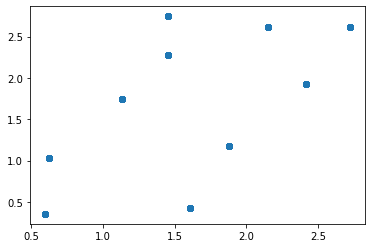

In [344]:
plt.scatter(y_train_hat[:,0], y_train_hat[:,1])
plt.show()

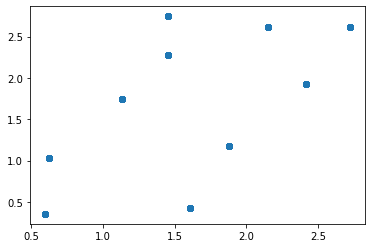

In [345]:
plt.scatter(y_test_hat[:,0], y_test_hat[:,1])
plt.show()

In [346]:
# tree.plot_tree(DTR)

## Tree Visulization

In [347]:
# Visualize the decision tree
dot_data = export_graphviz(DTR, out_file=None, 
                                feature_names= attributes_columns_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(path_of_data_folder + "decision_tree_max_sample_leaf=2000")  # This will save the tree to a file
graph.view()  # This will open the tree in a viewer

'/home/devunivaq/ResearchTasks/Approximate_BiSimulation_Relation_With_Regression_Tree/MatlabCode/CaseStudy_Simulation/NavigationSystem/Data_Files/4D_Data/OneStepSimulation/30k_R0_3/decision_tree_max_sample_leaf=2000.pdf'

## Information Extraction From Tree

In [348]:
print("Total Nodes = " + str(DTR.tree_.node_count))
print("Total Features = " + str(DTR.tree_.n_features))

Total Nodes = 19
Total Features = 4


In [349]:
# Get leaf nodes for each sample
leaf_nodes = DTR.apply(X_train)

# Group samples by leaf node
leaf_samples = {leaf: np.where(leaf_nodes == leaf)[0] for leaf in np.unique(leaf_nodes)}

In [350]:
leaf_samples.keys()

dict_keys([3, 4, 6, 7, 10, 12, 13, 15, 17, 18])

In [351]:
print("Number of Leaves = "  +  str(len(leaf_samples.keys())))


Number of Leaves = 10


# Updated constraint canculation function is below

In [352]:


def get_leaf_constraints(tree, X, leaf_samples):
    """
    Extracts feature constraints (min/max) for each leaf node based on decision tree splits.
    Falls back to dataset min/max **only when necessary** (if any constraint is still infinite).
    
    Parameters:
        tree: Trained DecisionTreeRegressor model.
        X: Feature dataset (NumPy array or Pandas DataFrame).
        leaf_samples: Dictionary mapping leaf node IDs to the list of row indices in X that reach that leaf.

    Returns:
        feature_constraints: Dictionary mapping leaf nodes to feature constraints {feature: (min, max)}.
    """
    tree_ = tree.tree_
    n_features = tree_.n_features

    # Ensure X is a NumPy array
    X = np.asarray(X)

    # Initialize dictionary to store feature constraints for each leaf
    feature_constraints = {}

    # Initialize stack for tree traversal (start from root node with no constraints)
    stack = [(0, {i: (-np.inf, np.inf) for i in range(n_features)})]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # If it's a leaf node
            if node_id in leaf_samples and len(leaf_samples[node_id]) > 0:
                X_leaf = X[leaf_samples[node_id], :]  # Extract subset of X that reaches this leaf
                
                # Initialize final constraints for this leaf using inherited constraints
                final_constraints = constraints.copy()

                for i in range(n_features):
                    leaf_min = X_leaf[:, i].min()
                    leaf_max = X_leaf[:, i].max()

                    # Update only the missing constraints
                    current_min, current_max = final_constraints[i]
                    
                    if current_min == -np.inf:
                        final_constraints[i] = (leaf_min, current_max)
                    if current_max == np.inf:
                        final_constraints[i] = (final_constraints[i][0], leaf_max)

                feature_constraints[node_id] = final_constraints

        else:  # Internal node, continue traversal
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]

            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (
                left_constraints[feature][0], 
                min(left_constraints[feature][1], threshold)
            )
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (
                max(left_constraints[feature][0], threshold), 
                right_constraints[feature][1]
            )
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints


# Extract feature constraints for each leaf node
leaf_constraints = get_leaf_constraints(DTR, X_train, leaf_samples)

In [353]:
# Print the results
for leaf, indices in leaf_samples.items():
    print(f"Leaf {leaf}:")
    print(f"  Samples: {indices.tolist()}")
    print(f"  Constraints:")
    for feature, (min_val, max_val) in leaf_constraints[leaf].items():
        print(f"    Feature {feature}: min = {min_val}, max = {max_val}")
    print()

Leaf 3:
  Samples: [9, 11, 20, 25, 30, 32, 46, 86, 91, 93, 101, 102, 105, 122, 144, 148, 159, 160, 164, 171, 172, 182, 185, 188, 189, 203, 227, 231, 232, 251, 252, 281, 282, 286, 292, 312, 320, 328, 337, 356, 359, 378, 390, 397, 410, 414, 423, 434, 447, 457, 462, 466, 467, 478, 480, 490, 496, 499, 506, 508, 518, 523, 537, 549, 552, 557, 559, 593, 595, 615, 635, 638, 645, 653, 656, 667, 680, 689, 691, 703, 704, 710, 712, 715, 722, 738, 743, 750, 755, 758, 763, 769, 802, 809, 817, 822, 823, 830, 839, 842, 844, 846, 848, 858, 875, 876, 877, 880, 881, 893, 895, 901, 904, 905, 919, 921, 927, 930, 934, 937, 941, 957, 973, 979, 982, 988, 997, 1002, 1014, 1020, 1030, 1032, 1034, 1037, 1045, 1052, 1053, 1061, 1063, 1071, 1076, 1093, 1102, 1115, 1116, 1130, 1133, 1144, 1181, 1183, 1190, 1200, 1212, 1219, 1236, 1250, 1252, 1253, 1271, 1277, 1279, 1283, 1296, 1298, 1300, 1314, 1317, 1320, 1326, 1329, 1331, 1340, 1341, 1352, 1372, 1373, 1377, 1393, 1403, 1410, 1430, 1433, 1445, 1446, 1461, 1466, 14

In [354]:
final_df = pd.DataFrame(columns=["Leaf"]+all_column_names)
final_df.head()

,Leaf,X1,X2,X3,X4,C1,C2,C3,C4


In [355]:
leaf_counter = 1
for leaf, indices in leaf_samples.items():
    tempOneDf = pd.concat( [X_train.iloc[indices.tolist()], y_train.iloc[indices.tolist()]], axis=1,)
    tempOneDf["Leaf"] = leaf_counter 
    # print(tempOneDf.shape)
    final_df = pd.concat([final_df, tempOneDf], ignore_index=True)
    # final_df
    leaf_counter = leaf_counter + 1
final_df.shape

/tmp/ipykernel_390669/2707120113.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, tempOneDf], ignore_index=True)


(30000, 9)

In [356]:
final_df.head()

,Leaf,X1,X2,X3,X4,C1,C2,C3,C4
0,1,0.733430,0.481480,0.11304,-0.008869,0.754750,0.47990,0.21321,-0.015734
1,1,0.705570,0.208710,0.11304,-0.008869,0.726890,0.20714,0.21321,-0.015734
2,1,0.048821,0.023113,0.11304,-0.008869,0.070142,0.02154,0.21321,-0.015734
3,1,0.613230,0.331090,0.11304,-0.008869,0.634560,0.32951,0.21321,-0.015734
4,1,0.144950,0.177420,0.11304,-0.008869,0.166270,0.17585,0.21321,-0.015734


In [357]:

# final_df.to_csv(file_name, sep='\t', encoding='utf-8', index=False, header=False)
final_df.to_csv(path_of_data_folder + 'leaf_classified_trejectory_dataset.csv', index=False, header=False)



## Test Sample Per Laef Extraction and saving

In [358]:
# Get leaf nodes for each sample
leaf_nodes = DTR.apply(X_test)

# Group samples by leaf node
leaf_test_samples = {leaf: np.where(leaf_nodes == leaf)[0] for leaf in np.unique(leaf_nodes)}

In [359]:
final_test_df = pd.DataFrame(columns=["Leaf"]+all_column_names)
final_test_df.head()
leaf_counter = 1
for leaf, indices in leaf_test_samples.items():
    tempOneDf = pd.concat( [X_test.iloc[indices.tolist()], y_test.iloc[indices.tolist()]], axis=1,)
    tempOneDf["Leaf"] = leaf_counter 
    # print(tempOneDf.shape)
    final_test_df = pd.concat([final_test_df, tempOneDf], ignore_index=True)
    # final_df
    leaf_counter = leaf_counter + 1
print("Shape of test" + str(final_test_df.shape))
print(final_test_df.head())
# final_df.to_csv(file_name, sep='\t', encoding='utf-8', index=False, header=False)
final_test_df.to_csv(path_of_data_folder + "leaf_classified_test_trejectory_dataset.csv", index=False, header=False)



Shape of test(5000, 9)
  Leaf       X1       X2       X3        X4       C1        C2       C3  \
0    1  0.88056  0.53373  0.11304 -0.008869  0.90188  0.532160  0.21321   
1    1  0.28747  0.21922  0.11304 -0.008869  0.30879  0.217640  0.21321   
2    1  0.15614  0.20526  0.11304 -0.008869  0.17746  0.203680  0.21321   
3    1  1.08120  0.56950  0.11304 -0.008869  1.10250  0.567920  0.21321   
4    1  0.59404  0.06393  0.11304 -0.008869  0.61536  0.062357  0.21321   

         C4  
0 -0.015734  
1 -0.015734  
2 -0.015734  
3 -0.015734  
4 -0.015734  


/tmp/ipykernel_390669/3870780191.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_test_df = pd.concat([final_test_df, tempOneDf], ignore_index=True)


In [360]:
# For constraints export - 2D Array - each row for leaf and in columns 
# we have "X1_min","X1_max", "Y1_min", "Y1_max", "X2_min", "X2_max", "Y2_min", "Y2_max"
constrants_array = []
for leaf, indices in leaf_samples.items():
    # print(f"Leaf {leaf}:")
    # print(f"  Samples: {indices.tolist()}")
    print(f"  Constraints:")
    constrants_on_leaf = []
    for feature, (min_val, max_val) in leaf_constraints[leaf].items():
        print(f"    Feature {feature}: min = {min_val}, max = {max_val}")
        constrants_on_leaf.append(min_val)
        constrants_on_leaf.append(max_val)
    print()
    constrants_array.append(constrants_on_leaf)
# constrants_array

  Constraints:
    Feature 0: min = 0.011632, max = 1.1536499857902527
    Feature 1: min = -0.0008374, max = 0.7010799944400787
    Feature 2: min = 0.11304, max = 0.11304
    Feature 3: min = -0.0088694, max = -0.0088694

  Constraints:
    Feature 0: min = 0.0010845, max = 1.1536499857902527
    Feature 1: min = 0.7010799944400787, max = 1.4839499592781067
    Feature 2: min = 0.0088694, max = 0.11304
    Feature 3: min = -0.11304, max = -0.0088694

  Constraints:
    Feature 0: min = 1.1536499857902527, max = 2.0113
    Feature 1: min = -0.00068459, max = 0.8738900125026703
    Feature 2: min = 0.11304, max = 0.11304
    Feature 3: min = -0.0088694, max = -0.0088694

  Constraints:
    Feature 0: min = 1.1536499857902527, max = 3.0006
    Feature 1: min = 0.8738900125026703, max = 1.4839499592781067
    Feature 2: min = 0.0088694, max = 0.11304
    Feature 3: min = -0.11304, max = -0.0088694

  Constraints:
    Feature 0: min = 0.0016937, max = 1.86599999666214
    Feature 1: min =

In [361]:

np.savetxt(path_of_data_folder + 'constrants_array_on_leaves.csv',constrants_array,delimiter=",")



## Update Complete here

## Main Code finish Here

## Main Code Finised Here

# Checking for Beta

In [102]:
import math

def calculate_beta(epsilon, N, d):
    """
    Calculate beta using the scenario optimization approach.

    Parameters:
        epsilon (float): Epsilon value.
        N (int): Total number of elements in the set (e.g., subsystems or scenarios).
        d (int): Maximum number of scenarios for the summation.

    Returns:
        float: Calculated beta.
    """
    beta = 0  # Initialize beta

    # Iterate over i from 1 to d (maximum scenarios to consider)
    for i in range(0, d - 1):
        # Calculate the binomial coefficient: C(N, i)
        binomial_coefficient = math.comb(N, i)
        
        # Compute the term for the summation
        term = binomial_coefficient * (epsilon ** i) * ((1 - epsilon) ** (N - i))
        
        # Add the term to the total beta
        beta += term
    
    return beta





In [103]:
# Example usage:
epsilon = 1.0000049500328346e-07  # Epsilon value
N = 100              # Number of elements
d = 4                # Summation limit

# Calculate beta
beta = calculate_beta(epsilon, N, d)
print(f"Beta: {beta}")

Beta: 1.0000000000000007


# Checking for Epsilon

In [104]:
import math
from scipy.optimize import fsolve

def calculate_epsilon(beta, N, d):
    """
    Calculate epsilon using the scenario optimization approach.

    Parameters:
        beta (float): The known beta value.
        N (int): Total number of elements (e.g., scenarios or subsystems).
        d (int): Maximum number of scenarios for the summation.

    Returns:
        float: Calculated epsilon.
    """
    # Define the equation to solve
    def equation(epsilon):
        summation = 0
        for i in range(0, d - 1 ):
            # Binomial coefficient
            binomial_coefficient = math.comb(N, i)
            # Add each term of the summation
            summation += binomial_coefficient * (epsilon ** i) * ((1 - epsilon) ** (N - i))
        return summation - beta

    # Use fsolve to solve the equation for epsilon
    epsilon_initial_guess = 1e-5  # A small initial guess
    epsilon_solution = fsolve(equation, epsilon_initial_guess)

    return epsilon_solution[0]




In [105]:
# Example usage:
beta = 1e-5  # Known beta value
N = 100           # Number of elements
d = 4             # Summation limit

# Calculate epsilon
epsilon = calculate_epsilon(beta, N, d)
print(f"Epsilon: {epsilon}")

Epsilon: 0.15400055911681956


In [362]:
beta = 1e-6  # Known beta value
str_lsit_sample_numbers = "3991	3337	3745	3751	3589	2000	2063	3414	2019	2091"
string_list = str_lsit_sample_numbers.split()
N_List = [int(i) for i in string_list]           # Number of elements
d = 4             # Summation limit

In [363]:
print(N_List)

[3991, 3337, 3745, 3751, 3589, 2000, 2063, 3414, 2019, 2091]


In [364]:
epsilons = []
for i in range(0,len(N_List)):
    N = N_List[i]
    # Calculate epsilon
    epsilon = calculate_epsilon(beta, N, d)
    epsilons.append(epsilon)
    
#print(epsilons)
# Print the results
print(f"Maximum Epsilon value: {max(epsilons)}")
print(f"Minimum Epsilon value: {min(epsilons)}")

Maximum Epsilon value: 0.009523732641291202
Minimum Epsilon value: 0.004782804113802019


In [365]:
betas = []
for i in range(0,len(N_List)):
    N = N_List[i]
    epsilon = epsilons[i]
    beta = calculate_beta(epsilon, N, d)
    betas.append(beta)
#print(betas)
# Print the results
print(f"Maximum Beta value: {max(betas)}")
print(f"Minimum Beta value: {min(betas)}")

Maximum Beta value: 1.000000000000343e-06
Minimum Beta value: 9.999999999997715e-07


In [ ]:

# Function to extract min/max constraints for each leaf node
def get_leaf_constraints(tree, X, leaf_samples):
    """
    Extracts the feature constraints (min/max) for each leaf node using dataset X.
    """
    tree_ = tree.tree_
    n_nodes = tree_.node_count
    n_features = tree_.n_features

    # Ensure X is a NumPy array
    X = np.asarray(X)

    # Initialize min/max values from dataset
    # global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    # print(global_min_max)
    
    feature_constraints = {}

    # Stack-based traversal of the tree
    stack = [(0, global_min_max.copy())]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # Leaf node
            feature_constraints[node_id] = constraints
            # print(node_id)
        else:
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]

                            
            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (left_constraints[feature][0], min(left_constraints[feature][1], threshold))
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (max(right_constraints[feature][0], threshold), right_constraints[feature][1])
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints


# Extract feature constraints for each leaf node
leaf_constraints = get_leaf_constraints(DTR, X_train, leaf_samples)

In [141]:
# This function gives the min and max of the constraintes with comparison. I think i need the main threshold instead of min and max

# Function to extract min/max constraints for each leaf node
def get_leaf_constraints(tree, X):
    """
    Extracts the feature constraints (min/max) for each leaf node using dataset X.
    """
    tree_ = tree.tree_
    n_nodes = tree_.node_count
    n_features = tree_.n_features

    # Ensure X is a NumPy array
    X = np.asarray(X)

    # Initialize min/max values from dataset
    # global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    # print(global_min_max)
    
    feature_constraints = {}

    # Stack-based traversal of the tree
    stack = [(0, global_min_max.copy())]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # Leaf node
            feature_constraints[node_id] = constraints
            # print(node_id)
        else:
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]

            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (left_constraints[feature][0], min(left_constraints[feature][1], threshold))
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (max(right_constraints[feature][0], threshold), right_constraints[feature][1])
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints


# Extract feature constraints for each leaf node
# leaf_constraints = get_leaf_constraints(DTR, X_train)

In [218]:
DTR.tree_.children_left[1]

2

In [ ]:

# constraints or boundries based on traning data
# Function to extract min/max constraints for each leaf node
def get_leaf_constraints(tree, X, leaf_samples):
    """
    Extracts the feature constraints (min/max) for each leaf node using dataset X.
    """
    tree_ = tree.tree_
    n_nodes = tree_.node_count
    n_features = tree_.n_features

    # Ensure X is a NumPy array
    X = np.asarray(X)

    # Initialize min/max values from dataset
    # global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    global_min_max = {i: (X[:, i].min(), X[:, i].max()) for i in range(n_features)}
    # print(global_min_max)
    
    feature_constraints = {}

    # Stack-based traversal of the tree
    stack = [(0, global_min_max.copy())]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # Leaf node
            constraints = {i: (X[leaf_samples[node_id], i].min(), X[leaf_samples[node_id], i].max()) for i in range(n_features)}
            feature_constraints[node_id] = constraints
            # print(node_id)
            # test = {i: (X[leaf_samples[node_id], i].min(), X[leaf_samples[node_id], i].max()) for i in range(n_features)}
            # print(test)
        else:
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]

            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (left_constraints[feature][0], threshold)
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (threshold, right_constraints[feature][1])
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints


# Extract feature constraints for each leaf node
leaf_constraints = get_leaf_constraints(DTR, X_train,leaf_samples)

In [51]:
type(leaf_samples)
leaf_samples.keys
# for key in leaf_samples:
#     print (key)
X_Train.iloc[leaf_samples[2]]
Y_Train.iloc[leaf_samples[2]]
# leaf_samples[2]

,T1,T2
0,0.42443,0.61354
1,0.42467,0.61352
2,0.42502,0.61349
3,0.42549,0.61345
4,0.42607,0.61340
...,...,...
2153,1.05700,0.37922
2154,1.06510,0.37747
2155,1.07310,0.37573
2156,1.08120,0.37402


  Constraints:
    Feature 0: min = 0.00041855, max = 0.5101650059223175
    Feature 1: min = -0.056612, max = 0.29745499789714813

  Constraints:
    Feature 0: min = 0.00041855, max = 0.3315500020980835
    Feature 1: min = 0.29745499789714813, max = 0.6208550035953522

  Constraints:
    Feature 0: min = 0.3315500020980835, max = 0.5101650059223175
    Feature 1: min = 0.29745499789714813, max = 0.6208550035953522

  Constraints:
    Feature 0: min = 0.5101650059223175, max = 0.854324996471405
    Feature 1: min = -0.056612, max = 0.16622500121593475

  Constraints:
    Feature 0: min = 0.5101650059223175, max = 0.854324996471405
    Feature 1: min = 0.16622500121593475, max = 0.3229999989271164

  Constraints:
    Feature 0: min = 0.5101650059223175, max = 0.6786850094795227
    Feature 1: min = 0.3229999989271164, max = 0.6208550035953522

  Constraints:
    Feature 0: min = 0.6786850094795227, max = 0.854324996471405
    Feature 1: min = 0.3229999989271164, max = 0.49963499605655

[[0.00041855, 0.5101650059223175, -0.056612, 0.29745499789714813],
 [0.00041855, 0.3315500020980835, 0.29745499789714813, 0.6208550035953522],
 [0.3315500020980835,
  0.5101650059223175,
  0.29745499789714813,
  0.6208550035953522],
 [0.5101650059223175, 0.854324996471405, -0.056612, 0.16622500121593475],
 [0.5101650059223175,
  0.854324996471405,
  0.16622500121593475,
  0.3229999989271164],
 [0.5101650059223175,
  0.6786850094795227,
  0.3229999989271164,
  0.6208550035953522],
 [0.6786850094795227,
  0.854324996471405,
  0.3229999989271164,
  0.4996349960565567],
 [0.6786850094795227,
  0.854324996471405,
  0.4996349960565567,
  0.6208550035953522],
 [0.00041855, 0.26362499594688416, 0.6208550035953522, 1.0230000019073486],
 [0.26362499594688416,
  0.462335005402565,
  0.6208550035953522,
  0.8467249870300293],
 [0.26362499594688416,
  0.462335005402565,
  0.8467249870300293,
  1.0230000019073486],
 [0.00041855, 0.462335005402565, 1.0230000019073486, 1.306950032711029],
 [0.46233500

In [95]:
leaf_constraints[2].items()

KeyError: 2

# Code completed Here

In [347]:
# import packages 
import pandas as pd 
import numpy as np 

# create dataframe 
df = pd.DataFrame({'Name': {0: 'Ram', 1: 'Deep', 2: 'Yash', 3: 'Aman', 4: 'Akash'}, 
				'Marks': {0: 68, 1: 87, 2: 45, 3: 78, 4: 56}}) 


# view dataframe 
print("Initial dataframe") 
display(df) 

testdf = df.iloc[[2,3]]
testdf['Pass'] 
# adding column with constant value 
df['Pass'] = True

# view dataframe 
print("Final dataframe") 
display(df) 


Initial dataframe


,Name,Marks
0,Ram,68
1,Deep,87
2,Yash,45
3,Aman,78
4,Akash,56


Final dataframe


/var/folders/2c/43cmhyln2s972415_6w44bhh0000gn/T/ipykernel_75654/2886168207.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.loc[[2,3],'Pass'] = True


,Name,Marks
0,Ram,68
1,Deep,87
2,Yash,45
3,Aman,78
4,Akash,56


In [233]:
node_indicator = DTR.decision_path(X_Train)
leaf_id = DTR.apply(X_Train)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:



KeyError: (0, 1)

In [201]:
node_depth[2]

2

In [225]:
n_nodes = DTR.tree_.node_count
print("Number of Total Nodes = " + str(n_nodes))
feature = DTR.tree_.feature
print("Features = " + str(feature))
threshold = DTR.tree_.threshold
threshold

DTR.tree_.n_node_samples
DTR.get_n_leaves()
path_Matrix = DTR.decision_path(X_Train)
# print(path_Matrix)
path_Matrix(1, 2)

Number of Total Nodes = 7
Features = [ 1  0 -2 -2  2 -2 -2]


TypeError: 'csr_matrix' object is not callable

In [157]:
n_nodes = DTR.tree_.node_count
children_left = DTR.tree_.children_left
children_right = DTR.tree_.children_right
feature = DTR.tree_.feature
threshold = DTR.tree_.threshold
values = DTR.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=np.around(values[i], 3)
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=np.around(values[i], 3),
            )
        )

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node with value=[[1.727]
 [1.324]]: go to node 1 if X[:, 1] <= 1.1758999824523926 else to node 4.
	node=1 is a split node with value=[[1.304]
 [0.754]]: go to node 2 if X[:, 0] <= 1.1840500235557556 else to node 3.
		node=2 is a leaf node with value=[[0.644]
 [0.747]].
		node=3 is a leaf node with value=[[1.743]
 [0.758]].
	node=4 is a split node with value=[[2.241]
 [2.015]]: go to node 5 if X[:, 2] <= 2.295199990272522 else to node 6.
		node=5 is a leaf node with value=[[1.765]
 [2.146]].
		node=6 is a leaf node with value=[[2.695]
 [1.891]].


In [163]:
node_indicator = DTR.decision_path(X_Train)
leaf_id = DTR.apply(X_Train)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:



IndexError: index 1 is out of bounds for axis 1 with size 1

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Sample dataset (replace with your actual dataset)
X = np.random.rand(100, 2) * 10  # 100 samples, 2 features
y = np.random.rand(100, 2)  # 2D target variable

# Train Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)

# Get leaf nodes for each sample
leaf_nodes = tree.apply(X)

# Group samples by leaf node
leaf_samples = {leaf: np.where(leaf_nodes == leaf)[0] for leaf in np.unique(leaf_nodes)}

# Function to extract min/max constraints for each leaf node
def get_leaf_constraints(tree, feature_names=None):
    """
    Extracts the feature constraints (min/max) for each leaf node.
    """
    tree_ = tree.tree_
    n_nodes = tree_.node_count
    feature_constraints = {}  # Stores constraints for each leaf
    
    # Dictionary to keep track of min/max for each feature
    min_max_constraints = {i: (-np.inf, np.inf) for i in range(tree_.n_features)}

    # Stack-based traversal of the tree
    stack = [(0, min_max_constraints.copy())]  # (node_id, feature_constraints)

    while stack:
        node_id, constraints = stack.pop()

        if tree_.children_left[node_id] == tree_.children_right[node_id]:  # Leaf node
            feature_constraints[node_id] = constraints
        else:
            feature = tree_.feature[node_id]
            threshold = tree_.threshold[node_id]
            
            # Left child (<= threshold)
            left_constraints = constraints.copy()
            left_constraints[feature] = (left_constraints[feature][0], threshold)
            stack.append((tree_.children_left[node_id], left_constraints))

            # Right child (> threshold)
            right_constraints = constraints.copy()
            right_constraints[feature] = (threshold, right_constraints[feature][1])
            stack.append((tree_.children_right[node_id], right_constraints))

    return feature_constraints

# Extract feature constraints for each leaf node
leaf_constraints = get_leaf_constraints(tree)

# Print the results
for leaf, indices in leaf_samples.items():
    print(f"Leaf {leaf}:")
    print(f"  Samples: {indices.tolist()}")
    print(f"  Constraints:")
    for feature, (min_val, max_val) in leaf_constraints[leaf].items():
        print(f"    Feature {feature}: min = {min_val}, max = {max_val}")
    print()


Leaf 4:
  Samples: [2, 6, 13, 16, 19, 25, 28, 31, 33, 35, 38, 41, 45, 50, 65, 66, 68, 70, 73, 74, 76, 77, 78, 80, 83, 89, 90, 93]
  Constraints:
    Feature 0: min = -inf, max = 3.2483408451080322
    Feature 1: min = -inf, max = 8.135478019714355

Leaf 5:
  Samples: [0, 1, 3, 8, 10, 11, 17, 18, 20, 23, 26, 29, 30, 34, 36, 37, 42, 47, 49, 51, 52, 53, 55, 59, 60, 62, 64, 67, 71, 72, 75, 81, 82, 85, 86, 87, 91, 94, 95, 96, 99]
  Constraints:
    Feature 0: min = 3.2483408451080322, max = 8.598616600036621
    Feature 1: min = -inf, max = 8.135478019714355

Leaf 7:
  Samples: [5, 14, 15, 21, 22, 24, 32, 43, 57, 58, 69, 79, 97, 98]
  Constraints:
    Feature 0: min = -inf, max = 8.598616600036621
    Feature 1: min = 8.135478019714355, max = 9.579225540161133

Leaf 8:
  Samples: [4, 9]
  Constraints:
    Feature 0: min = -inf, max = 8.598616600036621
    Feature 1: min = 9.579225540161133, max = inf

Leaf 10:
  Samples: [7]
  Constraints:
    Feature 0: min = 8.598616600036621, max = 8.696

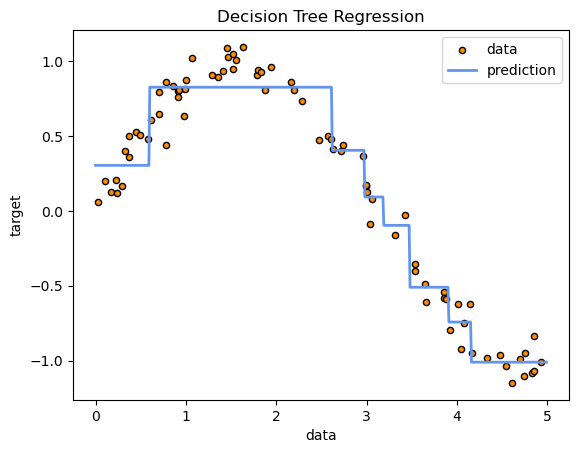

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# Create a simple dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Train the DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

# Visualize the decision tree
dot_data = export_graphviz(regressor, out_file=None, 
                           feature_names=['Feature'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # This will save the tree to a file
graph.view()  # This will open the tree in a viewer

# Plot the results
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()